In [1]:
import surf_3d_data_save as s3ds

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import torch

In [15]:
import climate_train as ct
import climate_models
import climate_job_maintenance as cjm
import climate_data
import json

In [4]:
def get_sep_fun(sigma):
    if sigma>0:
        dszarr=xr.open_zarr('/scratch/zanna/data/cm2.6/coarse-surf-data-sigma-'+str(sigma)+'.zarr')
    else:
        dszarr=xr.open_zarr('/scratch/zanna/data/cm2.6/surf-data.zarr')
    yu=dszarr.yu_ocean.values#.sel(yu_ocean=slice(-85,85))
    xu=dszarr.xu_ocean.values#.sel(yu_ocean=slice(-85,85))
    radius=6378.1
    dx=xu[1]-xu[0]
    dy=yu[1:]-yu[:-1]
    dx_=[]
    dy_=[]
    for i in range(len(yu)-1):
        y=yu[i]
        side_x=np.sin(np.pi*dx/180)*2*radius*np.sin(np.pi*(0.5-np.abs(y)/180))
        side_y=radius*np.sin(np.pi*(0.5-np.abs(y)/180))*dy[i]/180*np.pi
        dx_.append(side_x)
        dy_.append(side_y)
    dx_.append(dx_[-1])
    dy_.append(dy_[-1])
    return yu,dx_,dy_

In [16]:
lookupfile='/scratch/cg3306/climate/climate_research/model_data_info.json'
with open(lookupfile) as infile:
    datainfo=json.load(infile)

In [5]:
dszarr=xr.open_zarr('/scratch/zanna/data/cm2.6/surf-data.zarr')
xu=dszarr.xu_ocean.values
dx=xu[1]-xu[0]

In [6]:
args=ct.options(string_input="-b 3".split())

args.model_id=9003
offset=9000
args.model_bank_id="G"

C,names=climate_models.golden_model_bank(args,only_description=True,verbose=True)

x=[[1],[1],[0,1],[0],np.arange(4)]
J=cjm.jobnums(C=C,x=x,offset=offset)
fac=cjm.factor_jobnum(C,J)

root improvement 9000
	temp
		no - yes - 
	global
		no - yes - 
	res
		no - yes - 
	geophys
		no - yes - 
	sigma
		4 - 8 - 12 - 16 - 


In [7]:
args.model_id=9007
net,loss,data_init,partition=climate_models.golden_model_bank(args,only_description=False)

LCNN + 21x21 + surface + res + glbl + coarse(4) + batch= 2


/ext3/miniconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


domain id: 3


In [8]:
data_train=data_init(partition['train'])

In [9]:
data_train.outputs

['Su_r', 'Sv_r', 'ST_r']

In [10]:
fac

[[1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0],
 [1, 1, 0, 0, 1],
 [1, 1, 1, 0, 1],
 [1, 1, 0, 0, 2],
 [1, 1, 1, 0, 2],
 [1, 1, 0, 0, 3],
 [1, 1, 1, 0, 3]]

In [11]:
ls  /scratch/cg3306/climate/runs/G-9003/

MSE-co2.npy  SC2-co2.npy  best-model           grad-samples.npy  log.json
MSE.npy      SC2.npy      grad-probe-data.npy  last-model


In [12]:

G=np.load(root+str(J[ind])+'/grad-probe-data.npy')

NameError: name 'root' is not defined

In [94]:
ls /scratch/cg3306/climate/runs/G-9003/

best-model  grad-probe-data.npy  grad-samples.npy  last-model  log.json


In [13]:
G=np.load('/scratch/cg3306/climate/runs/G-'+str(J[1])+'/grad-probe-data.npy')
G.shape

(871, 2111, 105)

In [96]:
GS=np.load('/scratch/cg3306/climate/runs/G-'+str(J[1])+'/grad-samples.npy')
GS.shape

(20, 2111, 3, 3, 21, 21)

In [91]:
GS=GS[:,:9]

In [92]:
Z=np.zeros((21,21))
for i in range(21):
    for j in range(21):
        Z[i,j]=np.maximum(np.abs(i-10),np.abs(j-10))
Z=Z.astype(int)

In [93]:
R=np.zeros((GS.shape[0],GS.shape[1],11))
for i in range(11):
    R[:,:,i]=np.sum(GS[:,:,:,:,Z>=i]**2,axis=(2,3,4))

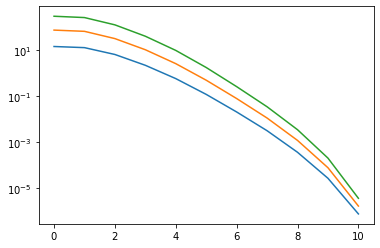

In [115]:
plt.semilogy(G[:,0,:].transpose())

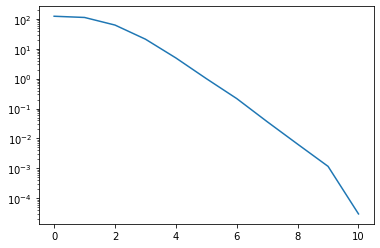

In [88]:
plt.semilogy(R[0,6,:])

In [36]:
ns=8
I=[np.random.choice(GS.shape[i],ns, replace=False) for i in range(2)]



GS=np.load('/scratch/cg3306/climate/runs/G-'+str(J[1])+'/grad-samples.npy')
gsv=GS[I[0],I[1],0,0]

In [37]:
gsv.shape

(8, 21, 21)

In [35]:
gsv.shape

(5, 3, 3, 21, 21)

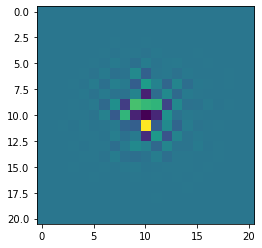

In [22]:
plt.imshow(GS[0,0,0,0])

In [38]:
G=np.load(root+str(J[ind])+'/grad-probe-data.npy')
C=G[0,:,:2]
G=G.reshape([G.shape[0],G.shape[1],3,35])
G=G[:,:,:,2:]
G=G.reshape([G.shape[0],G.shape[1],G.shape[2],3,11])
G=np.mean(G,axis=2)

In [18]:
root='/scratch/cg3306/climate/runs/G-'

In [49]:
ncol=2
nrow=4
ind=0
plotvarss=[]
for irow in range(nrow):
    for icol in range(ncol):
        G=np.load(root+str(J[ind])+'/grad-probe-data.npy')
        C=G[0,:,:2]
        G=G.reshape([G.shape[0],G.shape[1],3,35])
        
        G=G[:,:100,:,2:]
        G=G.reshape([G.shape[0],G.shape[1],G.shape[2],3,11])
        outscales=np.array(datainfo['G'][str(J[ind])]['outscales'])
        outscales=outscales.reshape([1,1,-1,1,1])
        G=np.sum(G**2*outscales**2,axis=2)
        G=G.reshape([-1,3,11])
        G=np.sort(G,axis=0)
        m=G.shape[0]
        G=np.sqrt(G[np.array([m//4,m//2,m//4*3])])
        plotvarss.append([xaxis,G])
        ind+=1

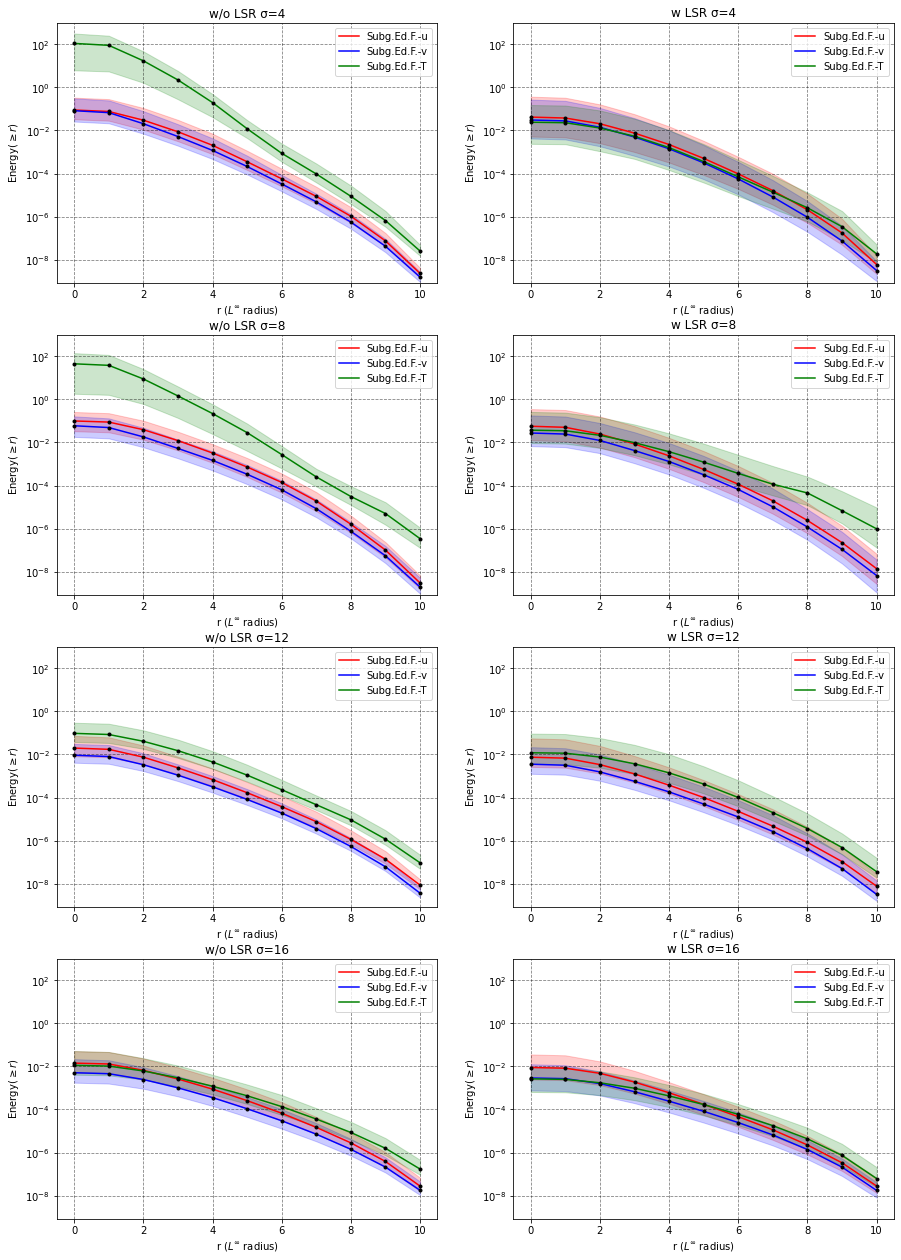

In [67]:
ncol=2
nrow=4
fig,axs=plt.subplots(nrow,ncol,figsize=(15,22))
fig.patch.set_facecolor('white')
titles=['w/o LSR','w LSR']
sigma=[str(i) for i in [4,8,12,16]]
titles=[tit+' \u03C3='+sigma[j] for j in range(len(sigma)) for tit in titles ]
legs=['Subg.Ed.F.'+'-'+st for st in ['u','v','T']]
ind=0
for irow in range(nrow):
    for icol in range(ncol):
        ax=axs[irow,icol]
        xaxis,G=plotvarss[ind]
        colors=['r','b','g','c']
        for i in range(3):
            ax.semilogy(xaxis,G[1,i,:],color=colors[i],label=legs[i])
            ax.semilogy(xaxis,G[1,i,:],'k.')
            ax.fill_between(xaxis, G[0,i,:],G[2,i,:], alpha=0.2,color=colors[i])
            ax.grid(color='k',linestyle='--',alpha=0.5)
            ax.set_title(titles[ind])
        ax.legend()
        ax.set_xlabel('r $(L^{\infty}$ radius)')
        ax.set_ylabel('Energy$(\geq r)$')
        if ind%2==0:
            miny,maxy=np.amin(G[0]),np.amax(G[2])
        ax.set_ylim([1e-9/1.2,1e3])
        ind+=1

In [43]:
ncol=3
nrow=4
cutexp=[-1,-3,-5]
cutvals=np.array([10**i for i in cutexp])
cutstr=['1e'+str(i) for i in cutexp]

yu,_,dy=get_sep_fun(0)
plotvars=[]
for ind in range(len(J)):
    G=np.load(root+str(J[ind])+'/grad-probe-data.npy')
    #G=G[:400]
    C=G[0,:,:2]
    G=G.reshape([G.shape[0],G.shape[1],3,35])
    
    G=G[:,:,:,2:]
    G=G.reshape([G.shape[0],G.shape[1],G.shape[2],3,11])
    
    outscales=np.array(datainfo['G'][str(J[ind])]['outscales'])
    outscales=outscales.reshape([1,1,-1,1,1])
    G=np.sqrt(np.sum(G**2*outscales**2,axis=2))
    #G=G/G[:,:,:,:1]
    
    


    yvals,I=np.unique(C[:,0],return_index=True)
    ny=len(yvals)
    I=np.append(I,C.shape[0])




    ncut=len(cutvals)

    S=np.zeros((ny,G.shape[2],ncut,3))


    for i in range(len(I)-1):
        GI=G[:,I[i]:I[i+1]]
        snum=GI.shape[0]*GI.shape[1]
        inchan=GI.shape[2]
        rad=GI.shape[3]
        GI=GI.reshape((snum*inchan,rad))
        GI=np.concatenate([GI,np.zeros((GI.shape[0],1))],axis=1)
        for j in range(ncut):
            AW=np.argwhere(GI<cutvals[j])
            _,U=np.unique(AW[:,0],return_index=True)
            D=AW[U,1]
            D=D.reshape((snum,inchan))
            m=D.shape[0]
            D=np.sort(D,axis=0)
            D=D[np.array([m//4,m//2,(3*m)//4])]
            D=D.transpose()
            S[i,:,j,:]=D*1

        #GI=np.sort(GI,axis=0)
        #m=GI.shape[0]
        #S[:,i]=GI[np.array([m//4,m//2,m//4*3])]
    S[S==11]=np.nan
    
    dy_=np.zeros(len(yvals))
    for i in range(len(yvals)):
        I=np.where(np.amin(np.abs(yvals[i]-yu))==np.abs(yvals[i]-yu))[0][0]
        dy_[i]=dy[I]*sigma[ind_]
        
        
    plotvars.append([yvals,S,dy_])
    print(J[ind])

9003
9007
9019
9023
9035
9039
9051
9055


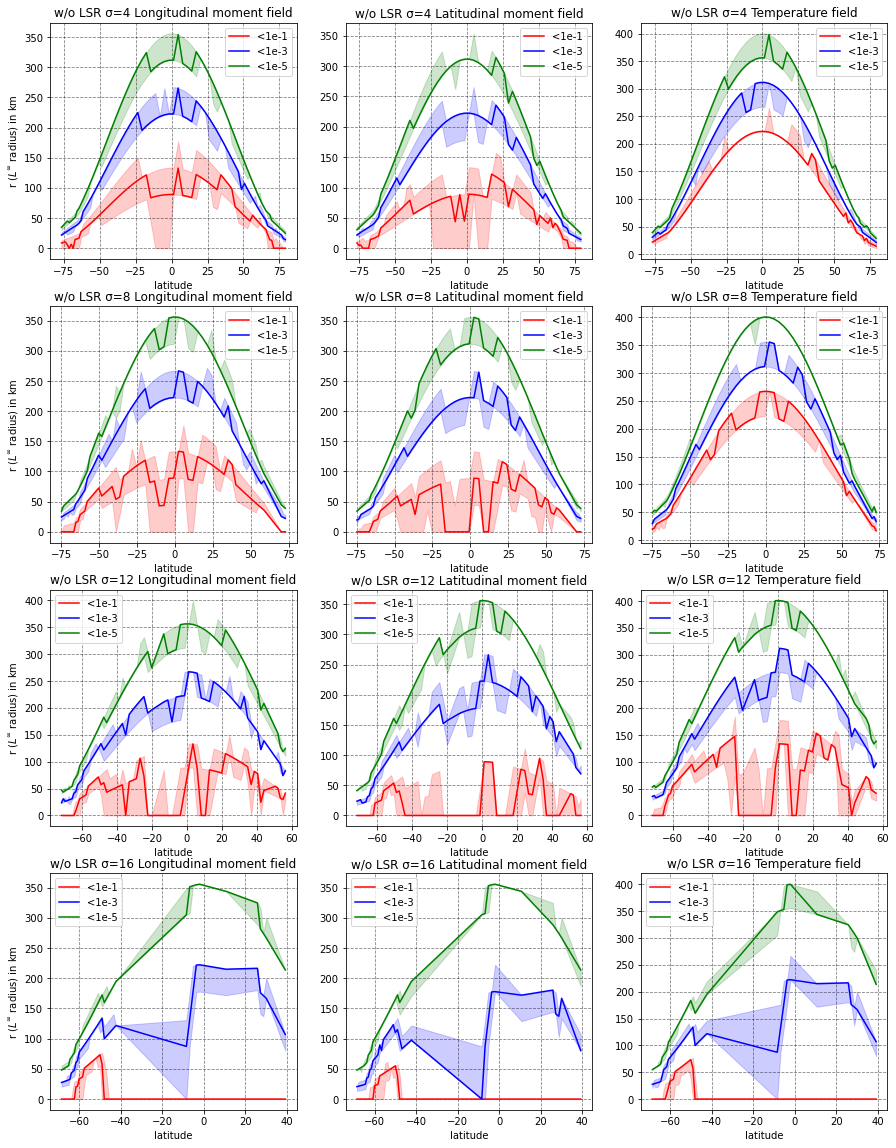

In [63]:
ncol=3
nrow=4
cutexp=[-1,-3,-5]
cutvals=np.array([10**i for i in cutexp])
cutstr=['1e'+str(i) for i in cutexp]


fig,axs=plt.subplots(nrow,ncol,figsize=(15,20))
fig.patch.set_facecolor('white')
titles=['w/o LSR','w LSR']
sigma=[i for i in [4,8,12,16]]
titles=[tit+' \u03C3='+str(sigma[j]) for j in range(len(sigma)) for tit in titles ]
var=['Longitudinal moment','Latitudinal moment','Temperature']
var=[vv+' field' for vv in var]
kmflag=True
resflag=False
yu,_,dy=get_sep_fun(0)
for ind_ in range(nrow):
    if resflag:
        ind=ind_*2+1
    else:
        ind=ind_*2
    yvals,S,dy_=plotvars[ind]
    if kmflag:
        S=S*dy_.reshape([-1,1,1,1])
 
    
    colors=['r','b','g','c']
    for i in range(ncol):
        ax=axs[ind_,i]
        for j in range(ncut):
            ax.plot(yvals,S[:,i,j,1],color=colors[j],label='<'+cutstr[j])
            ax.fill_between(yvals, S[:,i,j,0], S[:,i,j,2], alpha=0.2,color=colors[j])
        ax.grid(color='k',linestyle='--',alpha=0.5)
        ax.set_title(titles[ind]+' '+var[i])
        ax.legend()
        ax.set_xlabel('latitude')
        
        if i==0:
            if not kmflag:
                ax.set_ylabel('r $(L^{\infty}$ radius) in grid points')
            else:
                ax.set_ylabel('r $(L^{\infty}$ radius) in km')
        #ax.set_ylim([2,10])

Text(0.5, 0.98, 'Pseudo-Inverse Coarse-Graining Energy Decay \n Along Latitude\n\n')

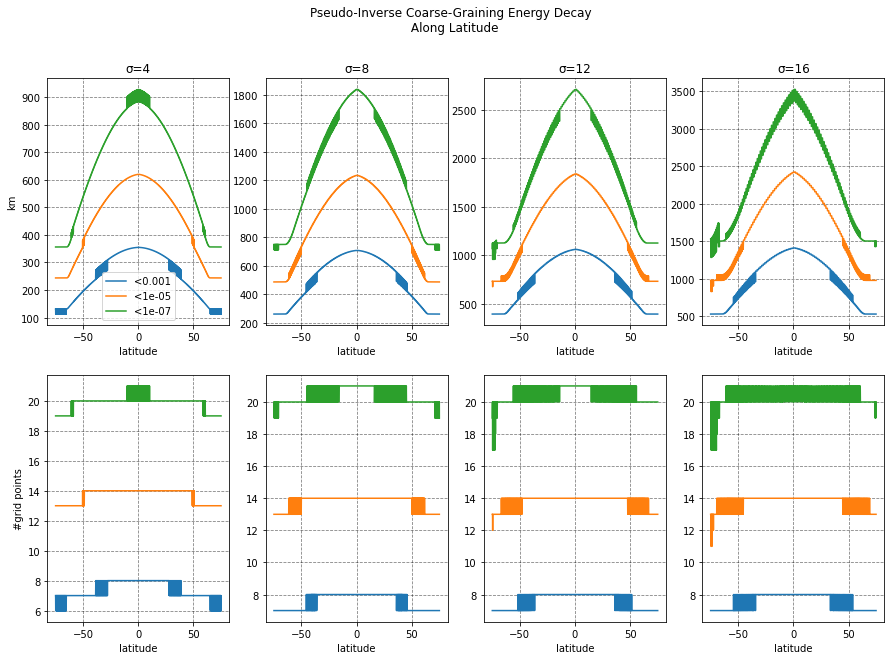

In [335]:

fig,axs=plt.subplots(2,4,figsize=(15,10))
fig.patch.set_facecolor('white')
for j in range(4):
    cuts,physlocs=material[j]
    
    yu,dx_,dy_=get_sep_fun(0)

    s1=1
    ss=s1*2+1
    mcuts=np.zeros((cuts.shape[0]-ss,cuts.shape[1]))
    mphyslocs=np.zeros((cuts.shape[0]-ss,cuts.shape[1]))
    for i in range(cuts.shape[0]-ss):
            mcuts[i]=np.median(cuts[i:i+ss,:],axis=0)
            mphyslocs[i]=np.median(physlocs[i:i+ss,:],axis=0)
    yu=yu[s1:-s1]
    I=np.where((yu<75)*(yu>-75))[0]


    ax=axs[0,j]
    for i in range(cuts.shape[1]):
        ax.plot(yu[I],mphyslocs[I,i]*111,label='<'+str(cutoffs[i]))
    ax.set_xlabel('latitude')
    if j==0:
        ax.set_ylabel('km')
    ax.set_title('\u03C3='+str(sigmas[j]))
    if j==0:
        ax.legend()
    ax.grid(color='k',linestyle='--',alpha=0.5)
    
    ax=axs[1,j]
    for i in range(cuts.shape[1]):
        ax.plot(yu[I],mcuts[I,i],label='<'+str(cutoffs[i]))
    ax.set_xlabel('latitude')
    if j==0:
        ax.set_ylabel('#grid points')
    #ax.set_title('\u03C3='+str(sigmas[j]))
    ax.grid(color='k',linestyle='--',alpha=0.5)
fig.suptitle('Pseudo-Inverse Coarse-Graining Energy Decay \n Along Latitude\n\n')

In [238]:
fig,axs=plt.subplots(1,1,figsize=(10,7))
fig.patch.set_facecolor('white')
colors=['tab:blue','tab:red','tab:green','k']
cuts=[]
for j in range(4):
    sigma=sigmas[j]
    q1,q2,q3,edges=material[j]
    #ax=axs[j]
    ax=axs
    medges=(edges[:-1]+edges[1:])/2*radius*np.pi/180
    k=np.minimum(40,m)
    title='\u03C3='+str(sigma)
    ax.semilogy(medges[:k],q2[:k],label=title,color=colors[j])
    
    ax.fill_between(medges[:k], q1[:k], q3[:k], alpha=0.2,color=colors[j])
    ax.set_xlabel('km\n x 1/111\N{DEGREE SIGN}')
    cuti=np.where(np.array(q2)<1e-7)[0][0]
    ax.axvline(x=medges[cuti+1],ls='--',color=colors[j])
    cuts.append(int(medges[cuti+1]/10)*10)
    #ax.set_title(title)
    #ax.set_ylim([1e-7,1])
ax.set_title('Pseudo-Inverse Coarse-Graining Energy Decay \n Along Latitude')
ax.grid(color='k',linestyle='--',alpha=0.5)
ax.legend(loc='upper right')
x0=0.13
y0=0.31
sz=14
dy=2.2e-2
fig.text(x0, y0, 'energy<1e-7 cut:', ha='left',size=sz)
for i in range(4):
    fig.text(x0, y0-dy*(1+i), '\u03C3='+str(sigmas[i])+': '+str(cuts[i])+' km', ha='left',size=sz)
#ax.legend()
#ax.set_title()
    

array([[101.81970061, 106.23854463, 110.50304054, 119.76387475,
        126.86075684],
       [101.81970061, 106.23854463, 110.50304054, 119.76387475,
        126.86075684],
       [101.81970061, 106.23854463, 110.50304054, 119.76387475,
        126.86075684],
       ...,
       [ 74.22144268,  69.63100572,  65.1652977 ,  55.35120964,
         47.72883933],
       [ 75.77479418,  69.63100572,  65.1652977 ,  56.69551184,
         47.72883933],
       [ 75.77479418,  71.14853696,  66.63851207,  56.69551184,
         48.94502212]])

In [153]:
material=[]
for j in range(4):
    
    sigma=sigmas[j]
    
    yu,dx_,dy_=get_sep_fun(0)
    dy_=np.array(dy_)[np.arange(len(dy_)//sigma)*sigma]
    yu=np.array(yu)[np.arange(len(yu)//sigma)*sigma]
    Qx=Qys[j]
    
    u,s,vh=np.linalg.svd(Qx)
    IQx=u[:,:len(s)]@np.diag(1/s)@vh
    D=IQx*0
    mx=IQx.shape[1]
    
    print(sigma,s[-1]/s[0],IQx.shape)
    for i in range(IQx.shape[0]):
        iqcx=np.abs(IQx[i])
        ai=np.argmax(iqcx)
        I=np.mod(np.arange(mx)+ai,mx)-mx//2
        iqcx=iqcx[I]
        #iqcx=(iqcx+iqcx[::-1])/2
        yuI=yu[I]
        yuI=np.abs(yuI[mx//2]-yuI)
        IQx[i]=iqcx#/iqcx[mx//2]
        D[i]=yuI*1
    
    m=200
    ee=[np.zeros(0) for i in range(m)]
    edges=np.linspace(np.amin(D),np.amax(D)/2,m+1)
    def register2bins(dists,energies,ee,edges):
        for i in range(len(edges)-1):
            e0=edges[i]
            e1=edges[i+1]
            I=np.where((dists>=e0)*(dists<e1))[0]
            ee[i]=np.concatenate([ee[i],energies[I]],axis=0)
        return ee
    for i in range(IQx.shape[0]):
        di=D[i]
        I=np.argsort(di)
        di=di[I]
        iqx=IQx[i,I]
        I=iqx>1e-7
        ee=register2bins(di,iqx,ee,edges)
    
    see=[np.sort(ee[i]) for i in range(len(ee))]
    q1=[se_[len(se_)//4] for se_ in see]
    q2=[se_[len(se_)//4*2] for se_ in see]
    q3=[se_[len(se_)//4*3] for se_ in see]
    material.append([q1,q2,q3,edges])

4 0.11416962623753645 (2700, 675)
8 0.11253564884934598 (2700, 337)
12 0.11269073532825764 (2700, 225)
16 0.11313395108543271 (2700, 168)


In [207]:
radius*np.pi/180

111.31884502145034

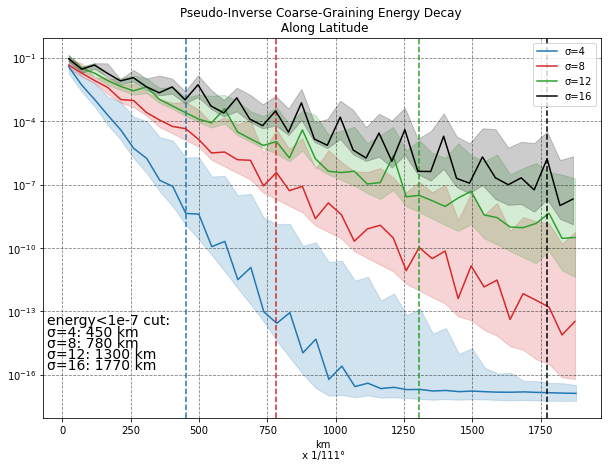

In [217]:
fig,axs=plt.subplots(1,1,figsize=(10,7))
fig.patch.set_facecolor('white')
colors=['tab:blue','tab:red','tab:green','k']
cuts=[]
for j in range(4):
    sigma=sigmas[j]
    q1,q2,q3,edges=material[j]
    #ax=axs[j]
    ax=axs
    medges=(edges[:-1]+edges[1:])/2*radius*np.pi/180
    k=np.minimum(40,m)
    title='\u03C3='+str(sigma)
    ax.semilogy(medges[:k],q2[:k],label=title,color=colors[j])
    
    ax.fill_between(medges[:k], q1[:k], q3[:k], alpha=0.2,color=colors[j])
    ax.set_xlabel('km\n x 1/111\N{DEGREE SIGN}')
    cuti=np.where(np.array(q2)<1e-7)[0][0]
    ax.axvline(x=medges[cuti+1],ls='--',color=colors[j])
    cuts.append(int(medges[cuti+1]/10)*10)
    #ax.set_title(title)
    #ax.set_ylim([1e-7,1])
ax.set_title('Pseudo-Inverse Coarse-Graining Energy Decay \n Along Latitude')
ax.grid(color='k',linestyle='--',alpha=0.5)
ax.legend(loc='upper right')
x0=0.13
y0=0.31
sz=14
dy=2.2e-2
fig.text(x0, y0, 'energy<1e-7 cut:', ha='left',size=sz)
for i in range(4):
    fig.text(x0, y0-dy*(1+i), '\u03C3='+str(sigmas[i])+': '+str(cuts[i])+' km', ha='left',size=sz)
#ax.legend()
#ax.set_title()
    

In [160]:
cuts

[800, 1560, 2230, 2970]

In [23]:
Qx.shape,len(),IQx.shape

((2700, 337), 337, (2700, 337))

4 0.26904003398685505 (3600, 900)
8 0.2638595226830395 (3600, 450)
12 0.2629123820281758 (3600, 300)
16 0.26263299525773715 (3600, 225)


Text(0.5, 0, 'x1°/σ')

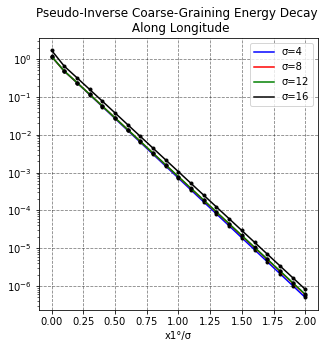

In [336]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
fig.patch.set_facecolor('white')
colors=['b','r','g','k']
for j in range(len(sigmas)):
    Qx=Qxs[j]
    sigma=sigmas[j]
    u,s,vh=np.linalg.svd(Qx[:,4:-4])
    IQx=u[:,:len(s)]@np.diag(1/s)@vh
    mx=IQx.shape[1]
    
    print(sigma,s[-1]/s[0],IQx.shape)
    for i in range(IQx.shape[0]):
        iqcx=np.abs(IQx[i])
        ai=np.argmax(iqcx)
        I=np.mod(np.arange(mx)+ai,mx)-mx//2
        iqcx=iqcx[I]
        iqcx=(iqcx+iqcx[::-1])/2
        IQx[i]=iqcx#/iqcx[mx//2]

    sp=20
    I=np.arange(sp+1)
    IQx=IQx[:,mx//2:]
    spiqx=np.abs(IQx[:,I])
    mqx=np.mean(spiqx,axis=0)
    sqx=np.std(spiqx,axis=0)
    ax.semilogy(I*0.1,mqx,color=colors[j],label='\u03C3='+str(sigma))
    ax.semilogy(I*0.1,mqx,'.k')
    #ax.fill_between(I, mqx-sqx, mqx+sqx, alpha=0.2,color=colors[j])
ax.legend()
ax.grid(color='k',linestyle='--',alpha=0.5)
ax.set_title('Pseudo-Inverse Coarse-Graining Energy Decay \n Along Longitude')
ax.set_xlabel('x1\N{DEGREE SIGN}/\u03C3')

In [ ]:
u,s,v=np.linalg.svd(Qx[:,4:-4])
IQx=v.T@np.diag(1/s)@v

4 0.11416962623753645 (2700, 675)
8 0.11253564884934598 (2700, 337)
12 0.11269073532825764 (2700, 225)
16 0.11313395108543271 (2700, 168)


Text(0.5, 0.04, 'The coarse grid distance away from center')

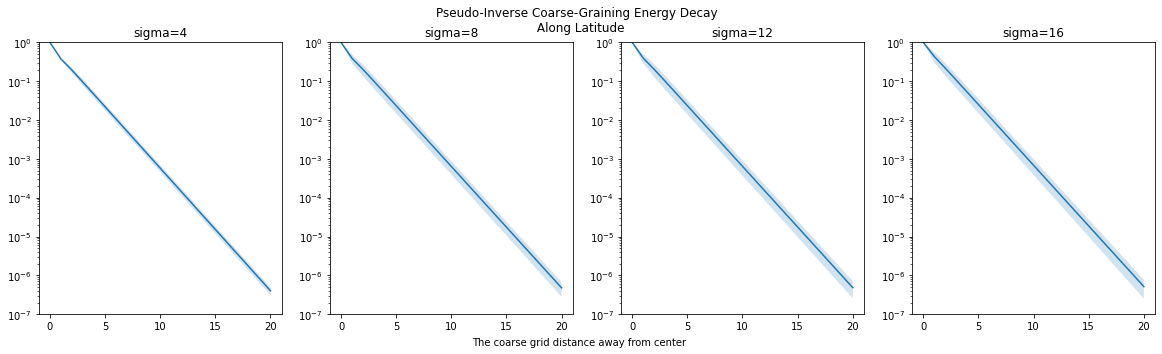

In [196]:
fig,axs=plt.subplots(1,4,figsize=(20,5))
fig.patch.set_facecolor('white')
colors=['b','r','g','k']
for j in range(len(Qxs)):
    Qx=Qys[j]
    sigma=sigmas[j]
    u,s,vh=np.linalg.svd(Qx)
    IQx=u[:,:len(s)]@np.diag(1/s)@vh
    mx=IQx.shape[1]
    
    print(sigma,s[-1]/s[0],IQx.shape)
    for i in range(IQx.shape[0]):
        iqcx=np.abs(IQx[i])
        ai=np.argmax(iqcx)
        I=np.mod(np.arange(mx)+ai,mx)-mx//2
        iqcx=iqcx[I]
        iqcx=(iqcx+iqcx[::-1])/2
        IQx[i]=iqcx/iqcx[mx//2]

    sp=20
    I=np.arange(sp+1)
    IQx=IQx[:,mx//2:]
    spiqx=np.abs(IQx[:,I])
    mqx=np.mean(spiqx,axis=0)
    sqx=np.std(spiqx,axis=0)
    ax=axs[j]
    ax.semilogy(I,mqx)#,color=colors[j])#,label=str(sigma))
    ax.fill_between(I, mqx-sqx, mqx+sqx, alpha=0.2)#,color=colors[j])
    title='\u03C3='+str(sigma)
    ax.set_title(title)
    ax.set_ylim([1e-7,1])
    
fig.suptitle('Pseudo-Inverse Coarse-Graining Energy Decay \n Along Latitude\n\n')
fig.text(0.5, 0.04, 'The coarse grid distance away from center', ha='center')
#ax.legend()
#ax.set_title()
    

In [163]:
j=0
Qx=Qys[j]
sigma=sigmas[j]
u,s,vh=np.linalg.svd(Qx)
IQx=u[:,:len(s)]@np.diag(1/s)@vh

In [165]:
CIQx=np.cumsum(IQx**2,axis=1)

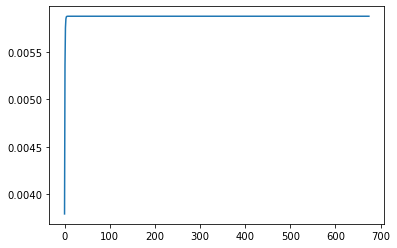